In [1]:
from localgraphclustering import *

import time
import numpy as np

# Memory and time efficient loading of graphs. Memory and time grows linearly w.r.t the number of edges.

In [2]:
# Download this dataset from http://snap.stanford.edu/data/com-Orkut.html
# This dataset has 3,072,441 nodes and 117,185,083 edges.
# Loading this graph requires dx cabout 5.3GB of memory and 2600 seconds on Macbook Pro 2016 with
# 2.9 GHz Intel Core i7, 16GB 2133 MHz LPDD3.
start = time.time()
g = graph_class_local.GraphLocal('/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist','edgelist','\t')
end = time.time()
print("running time:",str(end-start)+"s")

running time: 2480.554785013199s


# The routines below are applicable for scalable local graph clustering analytics; low memory requirements and fast running time. The memory and running time requirements are of the order of the volume of target cluster instead of the order of the volume of the graph.

# Call Approximate PageRank

In [3]:
# Create an object for the C++ version of the approximate PageRank algorithm.
pr_fast = approximate_PageRank_fast.Approximate_PageRank_fast()

reference_node = 3215

# Find an approximate PageRank vector by calling a C++ code.
output_pr_fast = pr_fast.produce([g],[reference_node])

# Round the output of Approximate PageRank

In [4]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=output_pr_fast[0][1])

# Get the rounded solution
solution = output_pr_fast[0][0][output_sc_fast[0][0]]

# The following method combines Approximate PageRank and Rounding

In [5]:
# Create an object for the approximate PageRank algorithm + Rounding (this method uses a fast C++ implementation).
pr_clustering = approximate_PageRank_Clustering.Approximate_PageRank_Clustering()

reference_node = 3215

# Find a cluster using approximate PageRank.
output_pr_clustering = pr_clustering.produce([g],[reference_node])

# Compute the Network Community Profile of the graph.

There are  187  connected components in the graph


/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:494: UserWarning: The graph has multiple (187) components, using the largest with 3072441 / 3072627 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))


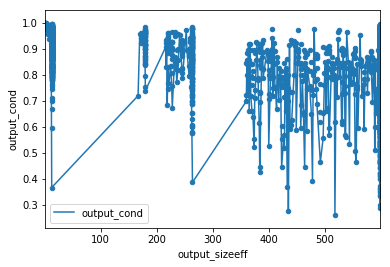

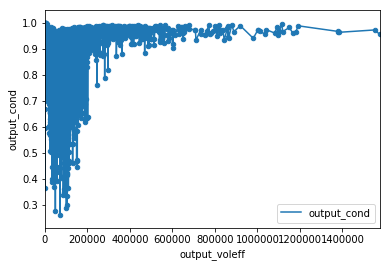

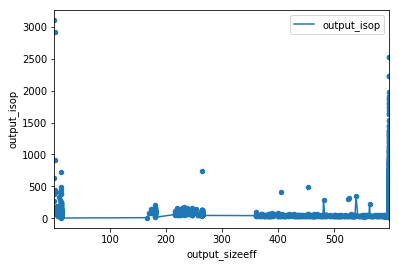

running time: 7349.606744289398s


In [6]:
# The code below will compute the NCP for the largest connected component of the graph.
# To compute the largest component the memory requirements are being doubled, i.e., two times
# the size of the graph object in line 2 above.

start = time.time()
ncp_instance = ncp.Ncp()
df = ncp_instance.produce(g,method="approxPageRank",ratio=0.5,timeout=7200)
ncp_plots = ncpplots.NCPPlots(df)
#plot conductance vs size
ncp_plots.cond_by_size()
#plot conductance vs volume
ncp_plots.cond_by_vol()
#plot isoperimetry vs size
ncp_plots.isop_by_size()
end = time.time()
print("running time:",str(end-start)+"s")

# Memory efficient NCP

In [ ]:
# The code below will compute the NCP of graph and not the NCP of the largest connected component.
# The code below does not double the memory requirements, but the result might be different than
# the example in line 6 above.

start = time.time()
ncp_instance = ncp.Ncp()
df = ncp_instance.produce(g,method="approxPageRank",ratio=0.5,timeout=7200,do_largest_component=False)
ncp_plots = ncpplots.NCPPlots(df)
#plot conductance vs size
ncp_plots.cond_by_size()
#plot conductance vs volume
ncp_plots.cond_by_vol()
#plot isoperimetry vs size
ncp_plots.isop_by_size()
end = time.time()
print("running time:",str(end-start)+"s")

# More to come. We will have scalable implementations for l1-regularized PageRank and Capacity Releasing Diffusion soon.